# MiniEP1 - Aproximação de Integrais usando Médias e Amostragem Uniforme

## Entrega do miniEP1

Preencha o nome dos 5 membros do seu grupo na tabela abaixo:

| Nome | NUSP |
|------|------|
| Raphael Ribeiro | 10281601 |
| Daniela Favero | 10277443 |
| Carolina Marques | 10737101 |
| Miguel Ostrowski | 10723610 |

**Apenas um dos membros** deverá entregar **este arquivo** `.ipynb`, com as soluções do miniEP1 **feitas pelo grupo**.

## Configuração do Ambiente

A primeira tarefa do miniEP1 é instalar e configurar o ambiente.

### Julia, Jupyter, IJulia

Para fazer o miniEP1, você vai precisar:

- [Instalar o Jupyter Notebook](https://jupyter.readthedocs.io/en/latest/install.html)
- Instalar Julia 1.3:
    - [Baixando o binário](https://julialang.org/downloads/)
    - **ou** [usando seu gerenciador de pacotes](https://julialang.org/downloads/platform/)
- Instalar o pacote *IJulia*:
    - Inicie o interpretador Julia
    - Digite `] add IJulia` e pressione `<ENTER>`
    
Depois disso, você vai conseguir iniciar o arquivo `.ipynb` do miniEP1.

### Pacotes Julia para o miniEP1

Os pacotes necessários para o miniEP1 estão listados no arquivo `Project.toml`, mas você pode instalar e atualizar os pacotes rodando a célula abaixo:

In [1]:
] up

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Installed MKL_jll ────────────────────── v2019.0.117+2
  Installed FriBidi_jll ────────────────── v1.0.5+2
  Installed Compat ─────────────────────── v3.8.0
  Installed StatsPlots ─────────────────── v0.14.3
  Installed Query ──────────────────────── v0.12.2
  Installed StaticArrays ───────────────── v0.12.1
  Installed DataFrames ─────────────────── v0.20.2
  Installed Distributions ──────────────── v0.23.2
  Installed Showoff ────────────────────── v0.3.1
  Installed IteratorInterfaceExtensions ── v1.0.0
  Installed Distances ──────────────────── v0.8.2
  Installed x265_jll ───────────────────── v3.0.0+0
  Installed DataValueInterfaces ────────── v1.0.0
  Installed Missings ───────────────────── v0.4.3
  Installed Rmath ──────────────────────── v0.6.1
  Installed RecipesBase ────────────────── v0.8.0
  Installed ColorTypes ─────────────────── v0.10.0
  Installed DataStructures ─────────────── v0.17.10
  Installed IntelOpenMP_jll ────────────── v2018.0.3+0
  Installed Bzip2_jll ────

Verifique o status dos pacotes, e se há algum problema, com o comando:

In [2]:
] st

Status `~/Downloads/miniEP1/Project.toml`
  [a93c6f00] DataFrames v0.20.2
  [31c24e10] Distributions v0.23.2
  [7073ff75] IJulia v1.21.1
  [1a8c2f83] Query v0.12.2
  [f3b207a7] StatsPlots v0.14.3


## Integração por Método de Monte Carlo

O objetivo deste miniEP é relembrar e aplicar alguns conceitos de estatística, independentes de linguagens de programação. Escolhemos usar a linguagem Julia para os experimentos, análises e geração de gráficos, mas a metodologia desenvolvida pode ser usada com qualquer ferramenta.

Você deve ler o texto neste arquivo e ir executando as células de código que encontrar. Assim vai definindo as funções progressivamente e vai gerar gráficos no final. Julia é uma linguagem compilada *Just-in-Time*, e a primeira vez que você executa uma célula pode levar algum tempo. Isso é por que os pacotes estão sendo compilados. A segunda execução da mesma função será mais rápida, verifique!

Vamos estimar o valor de algumas integrais usando o método de integração de Monte Carlo. A intuição por trás do método é que a integral de uma função $f$ pode ser estimada pela média do valor de $f$ num conjunto suficientemente grande de pontos obtidos a partir de uma distribuição uniforme.

Mais formalmente, para um conjunto de pontos $x_1,\dots,x_N$ uniformemente amostrados num intervalo $[a,b]$, a integral de $f$ no intervalo $[a,b]$ pode ser aproximada por:

$$
\int_{a}^{b} f(x)dx \approx \mathbb{E}\left[\left(b - a\right)\dfrac{1}{N}\sum\limits_{i = 1}^{N}{f(x_i)}\right] 
$$

Para uma representação gráfica da intuição, e para a prova dessa aproximação, veja [esta página](https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-in-practice/monte-carlo-integration).

O código abaixo define a função `monte_carlo_integrate`, que estima a integral de uma função `f` num intervalo `interval`, usando o método de Monte Carlo com amostras dadas pelo valor de `samples`. O código usa aplicação vetorizada de funções, através da sintaxe `função.(vetor)`, mas os comentários contêm código equivalente de uma versão usando loops. Usamos o pacote `Distributions` para gerar números pseudoaleatórios no intervalo $[a,b]$. Execute a célula abaixo:

In [4]:
using StatsPlots, Distributions, DataFrames, Query

function monte_carlo_integrate(f, interval, samples = 100)
    xs = rand(Uniform(interval[1], interval[2]), samples)
    
    # Using for loops:
    # accumulator = 0
    #
    # for x in xs
    #     accumulator += f(x)
    # end
    #
    # return accumulator / samples
    
    # Using vectorized function application:
    return sum(f.(xs)) / samples
end

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1260
┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1260
┌ Info: Precompiling Query [1a8c2f83-1ff3-5112-b086-8aa67b057ba1]
└ @ Base loading.jl:1260


monte_carlo_integrate (generic function with 2 methods)

### Primeiro Exemplo

Usamos a função `make_f1` abaixo para encapsular o parâmetro $a$ de uma função definida por:

$$
f_1(x) = \dfrac{2}{\sqrt{a ^ 2 - x ^ 2}}
$$

Se quiser saber mais, leia sobre [funções anônimas em Julia](https://docs.julialang.org/en/v1/manual/functions/#man-anonymous-functions-1).

Usando $a = 1$, definimos a função `f1`. A integral da função $f_1$, definida acima, é [dada por](https://en.wikipedia.org/wiki/List_of_definite_integrals#Definite_integrals_involving_rational_or_irrational_expressions):

$$
\int_{0}^{a}{f_1(x)dx} = \int_{0}^{a}{\dfrac{2}{\sqrt{a ^ 2 - x ^ 2}}dx} = \pi
$$

Vamos estimar a integral da função $f_1$ usando o método de Monte Carlo. Execute a célula abaixo:

In [5]:
function make_f1(a)
    return x -> 2 / (sqrt((a ^ 2) - (x ^ 2)))
end


a = 1
f1 = make_f1(a)

#3 (generic function with 1 method)

### Executando Experimentos e Gerando Resultados

A função `run_experiments` recebe uma função alvo `target_f`, um intervalo `interval`, um número de amostras `samples`, e a quantidade de repetições da estimação `repetitions` que devem ser feitas. A função devolve uma [estrutura do tipo `DataFrame`](https://juliadata.github.io/DataFrames.jl/stable/), que é essencialmente uma matriz com colunas nomeadas e de tipo fixo.

Abstrações como os `DataFrames` são extremamente úteis para representar dados tabelados, e são muito usadas em computação científica e em experimentos computacionais em geral. As linguagens [Python](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) e [R](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/data.frame) também têm abstrações equivalentes.

Nossa função "cresce" um `DataFrame` linha a linha, à medida que executa os experimentos. É prática comum repetir parâmetros para os experimentos, como a coluna `func` do nosso `DataFrame`, pois assim podemos misturar experimentos diferentes numa mesma estrutura.

In [6]:
function run_experiments(target_f, interval, samples, repetitions)
    results = DataFrame(func = String[], samples = Int[], integral = Float64[])
    
    for s in samples
        for r in 1:repetitions
            append!(results, DataFrame(func = ["target_f"],
                    samples = [s],
                    integral = monte_carlo_integrate(target_f, interval, s)))    
        end
    end
    
    return results
end

results = run_experiments(f1, [0, a], [10 ^ x for x in 0:5], 20)

,func,samples,integral
,String,Int64,Float64
1,target_f,1,2.34237
2,target_f,1,8.30273
3,target_f,1,2.36407
4,target_f,1,2.03781
5,target_f,1,2.12981
6,target_f,1,2.01796
7,target_f,1,5.36277
8,target_f,1,2.02057
9,target_f,1,5.48398


### Estimando a Integral e Manipulando os Resultados

Ao repetir a estimativa de uma integral para um número fixo de amostras, esperamos observar propriedades interessantes da variação do valor estimado. Neste miniEP, vamos nos preocupar com a *média* e o *desvio padrão* das amostras, e vamos calcular um *intervalo de confiança* de 95%.

A função `parse_results` recebe um `DataFrame` gerado pela função `run_experiments`, e gera um novo `DataFrame` com os valores da média e intervalo de confiança 95% das estimativas repetidas.

Utilizamos o operador *pipe* `|>` e pacote [Query](https://www.queryverse.org/Query.jl/stable/) para fazer os cálculos. O operador `|>` é binário, e seu significado é "*passe o argumento da esquerda como primeiro parâmetro da função à direita*":

In [7]:
? |>

search: |>



```
|>(x, f)
```

Applies a function to the preceding argument. This allows for easy function chaining.

# Examples

```jldoctest
julia> [1:5;] |> x->x.^2 |> sum |> inv
0.01818181818181818
```


A [macro](https://docs.julialang.org/en/v1/manual/metaprogramming/#man-macros-1) `@groupby` agrupa as linhas de um `DataFrame` pela variável passada como parâmetro. O caractere `_` faz referência ao `DataFrame` passado pelo operador `|>`.

A macro `@map` recebe um dicionário de funções, onde a chave será uma coluna do novo `DataFrame`, e o valor é uma função envolvendo ou não as colunas originais.

A função de chave `mean_integral`, por exemplo, calcula a média dos valores da coluna `integral` original, agrupada por `samples`. A coluna `ci_estimate`, por sua vez, conterá uma estimativa do intervalo de confiança 95%.

O operador `|>` e o pacote Query permitem escrever código muito similar ao produzido pela [biblioteca dplyr](https://dplyr.tidyverse.org/) da linguagem R. Execute a célula abaixo:

In [8]:
function parse_results(results, target_integral)
    parsed_results = results |>
                    @groupby(_.samples) |>
                    @map({samples = key(_),
                          mean_integral = mean(_.integral),
                          ci_estimate = 1.96 * std(_.integral),
                          target = target_integral}) |>
                    DataFrame
    
    return parsed_results
end

parsed_results = parse_results(results, pi)

,samples,mean_integral,ci_estimate,target
,Int64,Float64,Float64,Irration…
1,1,3.27059,4.05297,π
2,10,2.93737,1.1261,π
3,100,3.08438,0.675273,π
4,1000,3.13416,0.197293,π
5,10000,3.13423,0.0904968,π
6,100000,3.14406,0.0253559,π


### Análise Visual: Gerando Gráficos

A função `plot_raw_results` gera um gráfico com cada uma das repetições da estimativa do valor da integral, no eixo y, para cada uma das quantidades de repetições, no eixo x. Usamos o [pacote Plots](https://docs.juliaplots.org/latest/) para gerar os gráficos.

Para o miniEP1, você não precisa escrever seus próprios gráficos, mas recomendamos fortemente que você aprenda alguma biblioteca de plotagem, pois vai precisar delas nos EPs seguintes.

Sugerimos aprender uma das seguintes bibliotecas:

- [ggplot2](https://ggplot2.tidyverse.org/) (R)
- [matplotlib](https://matplotlib.org/) (Python)
- [Plots](https://docs.juliaplots.org/latest/) (Julia)

Todas essas bibliotecas podem ser usadas em Notebooks Jupyter. Execute a célula abaixo:

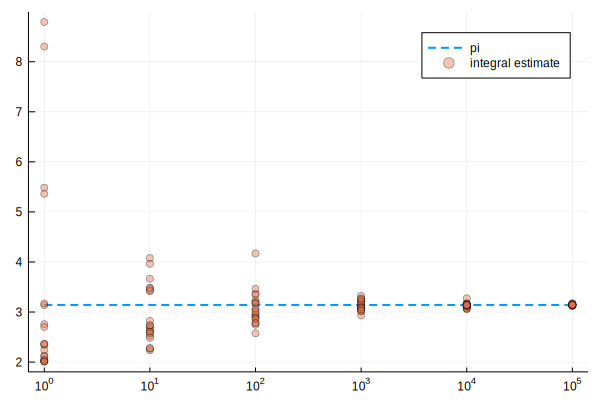

In [9]:
function plot_raw_results(parsed_results, target_label)
    plot(parsed_results.samples,
         parsed_results.target,
         labels = target_label,
         line = :dash,
         width = 2.0)
    scatter!(results.samples,
             results.integral,             
             xscale = :log10,
             alpha = 0.4,
             labels = "integral estimate")
end

plot_raw_results(parsed_results, "pi")

### Exercícios

Os exercícios procuram revisitar conceitos de estatística básica, dando a oportunidade de analisar qualitativa e quantitativamente resultados de experimentos computacionais. A metodologia exercitada aqui será útil nos EPs subsequentes, e em casos futuros onde a análise de experimentos seja necessária.

#### Exercício 1

**a)** Execute a célula acima para gerar o gráfico. Observando o gráfico gerado, descreva *qualitativamente* o comportamento das estimativas da integral, em relação ao seu valor esperado, à medida que aumentamos o número de pontos amostrados. Use a célula abaixo para escrever sua resposta.

O gráfico reflete uma característica de Monte Carlo. Como ele se baseia em amostragens aleatórias, quanto maior a amostra menor a probabilidade de o resultado final estar errado, como é mostrado na figura: amostras pequenas podem chegar perto do resultado mas com probabilidade pequena e por isso produzem resultados de qualidade ruim por, no geral, terem erros muito grandes, enquanto amostras maiores tem probabilidade alta de chegar a um resultado correto (ou com um erro pequeno) e, portanto, são amostras de qualidade maior. No geral, como indicado pelo gráfico, quanto maior a amostra, mais próximo do valor correto está o resultado final e assim, maior a qualidade do resultado.

**b)** Leia o verbete sobre [valor esperado](https://en.wikipedia.org/wiki/Expected_value) na Wikipedia, e escreva um parágrafo definindo a média de uma amostra. Como podemos interpretar a média? Escreva uma fórmula em $\LaTeX$ para a média.

A média de uma amostra é definida pela soma dos produtos do valor que cada variável aleatória da amostra pode assumir com a probabilidade dela ocorrer. Esse cálculo se dá por meio de várias realizações independentes da variável aleatória. Isso significa que a média da amostra nada mais é do que uma média ponderada desses valores que a variável aleatória pode assumir. 

Podemos interpretar a média da amostra como um indicativo da distribuição da variável aleatória analisada: é a partir dessa média que podemos obter informações sobre o comportamento da amostra e o valor esperado daquela variável.

#### Média:
$$
E[X] = \sum^{k}_{i=1}x_ip_i
$$

**c)** Leia o verbete sobre [intervalo de confiança](https://en.wikipedia.org/wiki/Confidence_interval) na Wikipedia, e escreva um parágrafo com uma **descrição da intuição** por trás da definição de intervalo de confiança. Explique também a relação entre a variância estimada de uma amostra, o desvio padrão, e o intervalo de confiança a 95%.

Escreva fórmulas em $\LaTeX$ para a variância e o desvio padrão, mas não se preocupe com a formalização da definição do intervalo de confiança, estamos interessados na intuição por trás da ideia.

Um intervalo de confiança é um intervalo com uma proporção associada gerada por uma amostra inicial, de modo que se o experimento for repetido várias vezes e o intervalo de confiança for recalculado para cada experimento com mesmo procedimento, tal proporção de intervalos de confiança conteria o parâmetro estatístico em questão. A partir desse resultado, obtém-se a confiabilidade de uma estimativa.

O intervalo de confiança indica a probabilidade de um intervalo conter um determinado parâmetro estatístico, e esse parâmetro pode ser a variância ou o desvio padrão. Ou seja, quando não se sabe exatamente o valor da variância/do desvio padrão, basta pegar uma certa quantia de amostras para obter o intervalo de confiança relativo ao parâmetro. Se esse intervalo de confiança for, por exemplo, a 95%, significa que 95% dos intervalos construídos nas amostras iriam conter a variância/o desvio padrão.  

#### Variância:
$$
V = s^2 = \dfrac{\sum^{n}_{i=1} (X_i - \bar{X})^2}{n}
$$

#### Desvio padrão:
$$
Dp = s = \sqrt{\dfrac{\sum^{n}_{i=1} (X_i - \bar{X})^2}{n-1}}
$$


**d)** A função `plot_results` gera um gráfico sumarizando os dados da figura anterior. O gráfico gerado mostra a média das estimativas e o intervalo de confiança 95%, calculados anteriormente.

Execute a célula abaixo e gere o gráfico. Interprete os resultados *quantitativamente*, em termos da média e do intervalo de confiança. Responda também:

1. Esse é o comportamento que você esperava para a estimativa pelo método de Monte Carlo? Por que?
2. Que engano poderíamos cometer, se não calculássemos o intervalo de confiança?

### 1D 
A média tem um resultado muito mais próximo do valor que estamos procurando (pi) já que depende de várias simulações, tendo um resultado mais constante e não tendo tanta variância quanto se estivéssemos fazendo testes individuais como no gráfico do 1-a fazendo com que a média seja muito mais próxima do meio do intervalo de confiança e, consequentemente, com que o resultado seja mais próximo do que esperamos.

### 1
Não. Pois o método de Monte Carlo, em si, é composto pelos testes individuais de N pontos em um intervalo de uma função e não depende da média de inúmeros testes, como foi feito nesse gráfico. Além disso, o método de Monte Carlo tem uma variância muito maior em relação ao gráfico que obtivemos usando a média, não sendo tão preciso quanto esse.

### 2
Se não calcularmos o intervalo de confiabilidade, corremos o risco de o resultado ser um caso que foge da confiança de 95% dos casos e assim podendo ficar com algum caso extremo que será muito distante do valor que queremos encontrar. E mesmo que não seja casos extremos, casos que ficam fora do intervalo de confiança são resultados que ficam mais distantes do resultado que queremos, logo tem uma menor precisão.

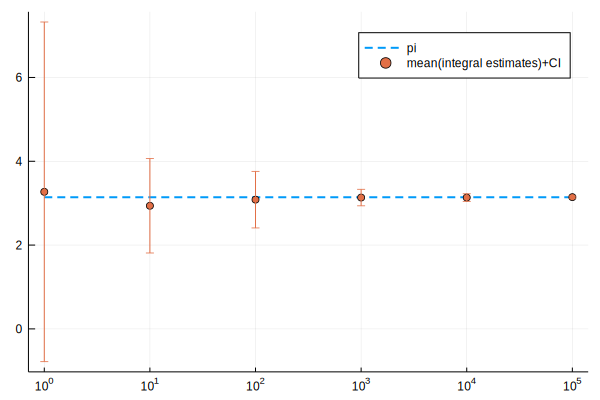

In [10]:
function plot_results(parsed_results, target_label)
    plot(parsed_results.samples,
         parsed_results.target,
         labels = target_label,
         line = :dash,
         width = 2.0)
    scatter!(parsed_results.samples,
             parsed_results.mean_integral,             
             yerror = parsed_results.ci_estimate,        
             xscale = :log10,        
             labels = "mean(integral estimates)+CI")
end

plot_results(parsed_results, "pi")

#### Exercício 2

**a)** Implemente em Julia a [função descrita abaixo](https://towardsdatascience.com/monte-carlo-integration-is-magic-c7f817d89610):

$$
f_2(x) = 2xe^{x^2}
$$

A integral de $f_2$ é dada por:

$$
\int_{0}^{1}{f_2(x)dx} = \int_{0}^{1}{2xe^{x^2}}dx = e - 1
$$

Vamos estimar essa integral usando método de Monte Carlo. Use a célula abaixo, e apenas complete a definição de `f2`. Execute a célula.

In [17]:
function f2(x)
    return 2*x*exp(x*x)
end


results = run_experiments(f2, [0.0, 1.0], [10 ^ x for x in 0:5], 30)
parsed_results = parse_results(results, Base.MathConstants.e - 1)

,samples,mean_integral,ci_estimate,target
,Int64,Float64,Float64,Float64
1,1,1.20707,2.27764,1.71828
2,10,1.84034,0.893745,1.71828
3,100,1.72954,0.251828,1.71828
4,1000,1.71803,0.0813782,1.71828
5,10000,1.7206,0.0325514,1.71828
6,100000,1.71992,0.00699815,1.71828


**b)** Gere as duas figuras, executando as células abaixo. Interprete os resultados *quantitativamente*, como fez no exercício **1d**. Escreva sua resposta na célula abaixo.

Os gráficos mostram que amostras maiores não só chegam na média mais próximas do valor correto como também que elas tem uma diferença menor de resultados entre elas mesmas. Como se era esperado do Método de Monte Carlo. Isso deixa claro como amostras de tamanho pequeno podem gerar problemas, uma amostra de tamanho 1 pode chegar ao valor correto e - 1 (apesar da probabilidade disso ocorrer ser relativamente pequena) enquanto outras amostras do mesmo tamanho variam de resultado podendo ir de 0 a 5. Amostras maiores como 10.000 não só chegam, em média, no resultado correto como a grande maioria delas tem valor muito proximo a e - 1, uma vez que, a probabilidade do valor calculado estar errada ser pequena para amostras grandes, o que as torna mais confiáveis. 

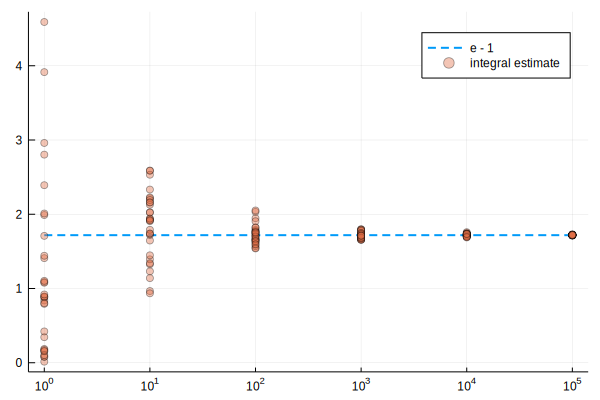

In [18]:
plot_raw_results(parsed_results, "e - 1")

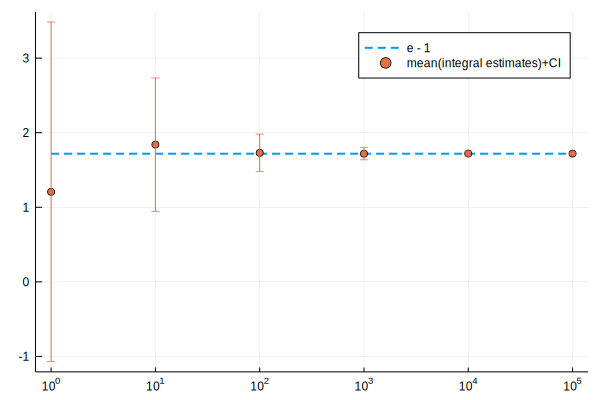

In [19]:
plot_results(parsed_results, "e - 1")

**c)** Implemente em Julia a [função abaixo](https://en.wikipedia.org/wiki/Euler%E2%80%93Mascheroni_constant#Integrals):

$$
f_3(x) = \dfrac{1}{\text{ln}x} + \dfrac{1}{1 - x}
$$

A integral de $f_3$ é dada por:

$$
\int_{0}^{1}{f_3(x)dx} = \int_{0}^{1}{\left(\dfrac{1}{\text{ln}x} + \dfrac{1}{1 - x}\right)dx} = \gamma
$$

Use a célula abaixo, e apenas complete a definição de `f3`. Execute a célula.

In [14]:
function f3(x)
    return 1/log(x) + 1/(1-x)
end

results = run_experiments(f3, [0.0, 1.0], [10 ^ x for x in 0:5], 20)
parsed_results = parse_results(results, Base.MathConstants.eulergamma)

,samples,mean_integral,ci_estimate,target
,Int64,Float64,Float64,Irration…
1,1,0.579533,0.121524,γ
2,10,0.582147,0.0275576,γ
3,100,0.575908,0.0139984,γ
4,1000,0.577165,0.00359411,γ
5,10000,0.577363,0.00127839,γ
6,100000,0.577144,0.000514306,γ


**d)** Gere as duas figuras, executando as células abaixo. Interprete os resultados *quantitativamente*, como fez no exercício **1d**. Escreva sua resposta na célula abaixo.

Analisando os valores de integral obtidos, podemos observar que a média dos valores mais o intervalo de confiança apresentam variância e amplitude inversamente proporcionais ao tamanho da amostra. Isto é, a medida que o tamanho da amostra aumenta, temos valores de integral mais próximos do valor correto. O erro esperado ao tomar uma estimativa aleatória uniformemente entre todas as estimativas com o mesmo tamanho de amostra é menor para valores de amostra maiores. 

No gráfico abaixo, verificamos que para amostra de tamanho 1, o valor mais alto obtido está acima de 0.70, enquanto que o valor mais baixo está proximo de 0.50, apresentando uma amplitude aproximada de 0.20. Para amostras de tamanho acima de 100, as estimativas obtidas apresentam amplitude menor que 0.05 e menor variância.

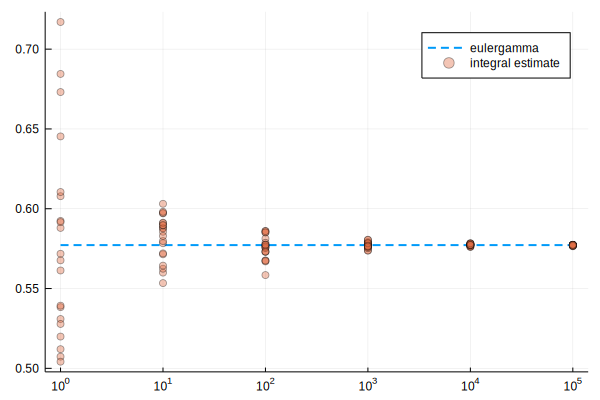

In [15]:
plot_raw_results(parsed_results, "eulergamma")

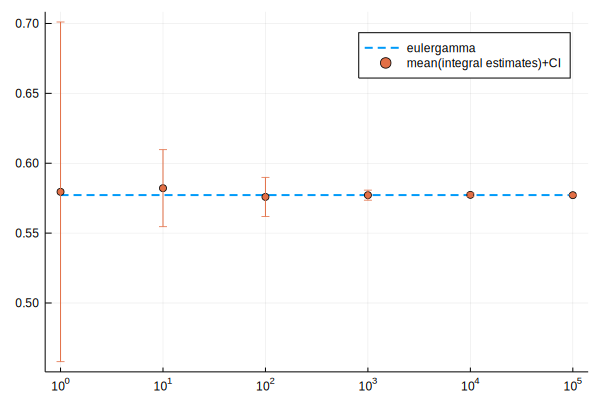

In [16]:
plot_results(parsed_results, "eulergamma")